In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt

def magic_f(xs):
    return [-0.7*x**3 - 0.5*x**2 + 0.3*x + 0.9 for x in xs]

# Applied Machine Learning: introduction

### All slides are available at https://github.com/lisitsyn/courses/blob/master/hse-aml/

### Course staff

- Main instructor: Sergey Lisitsyn (lisitsyn@hey.com), HSE & Yandex
- Teaching assistant: Nataliya Pivnitskaya (pivnitskaya.natali@gmail.com), HSE

# Scope

- Essential machine learning methods
- An engineering and optimization views on machine learning
- Useful tips and tricks
- Structuring machine learning projects
- Industrial practices of ML

# Out of scope

- Data engineering *e.g. how to store and process huge amounts of data*
- Classic statistical things *e.g. we won't care about heteroscedasticity* 
- State-of-the-art models *e.g. no specific tricks to train ULMFiT*

# Grading

- 50% comes from two homeworks
- 10% comes from quizes
- 0-40% you get during the exam

# Books to consider

- [A Course in Machine Learning](http://ciml.info/) (Hal Daumé III) *gives you a great overview of ML*
- [Elements of Statistical Learning](http://web.stanford.edu/~hastie/ElemStatLearn/) (Hastie et al) *serves as a reference book*
- [Deep Learning](http://www.deeplearningbook.org) (Goodfellow et al) *gets you into deep learning*

# MOOCs and courses to consider

- [Machine Learning Crash Course by Google](https://developers.google.com/machine-learning/crash-course)
- [Applied Machine Learning (Columbia, W4955)](https://www.cs.columbia.edu/~amueller/comsw4995s19/schedule/)
- [Improving your statistical inferences](https://www.coursera.org/learn/statistical-inferences)
- [Deep Learning specialization](https://www.coursera.org/specializations/deep-learning), esp. *Structuring Machine Learning Projects*
- [Advanced Machine Learning specialization](https://www.coursera.org/specializations/aml), esp. *How to Win a Data Science Competition*

# Upcoming changes

- We will have graded tests (contributes 10% of your final score)
- We will mostly use Google Colab for homeworks
- The neural network (aka deep learning) part will be extended 

# Programming in ML

- You've got to code to be successful in ML
- No platform user ever won a Kaggle
- We will use Python and its powerful libraries

# Why Python?

- De-facto standard language of data science
- Easy to learn and versatile
- Used both in production systems and by researchers
- A lot of libraries around
- Easy to extend with native (C and C++) libraries

# Libraries

The best way to install libraries locally is to use **conda** from **Anaconda**

In this course we're going to use sklearn (scikit-learn), XGBoost and CatBoost, Keras, and a few more libraries

# Jupyter

1. These slides are made with Jupyter
1. Google has a hosted [Jupyter-like Colab]( https://colab.research.google.com)

In [14]:
import sklearn
import xgboost
import tensorflow.keras

sklearn.__file__

'/Users/lisitsyn/anaconda3/lib/python3.6/site-packages/sklearn/__init__.py'

# Why don't we use ..

- **R?** Python is more versatile and has more important libraries
- **Machine Learning Platforms?** They are good to sell and promote but seldom used by anyone
- **Java/..?** Too verbose for data science

# Machine learning

- Studies an ability to learn without being explicitly programmed
- In ML, the task is usually to transform amounts of data (the past) into a prediction procedure (the future)
- Such a task is much simpler than general AI
- Yet it never gets solved

### Examples

- We know the history of transactions for realty in Moscow. What is the price for **this flat F**?
- These are images of cats and these are images of dogs. What's on **the picture P**?

- Your example?

# No free lunch

- The *no free lunch* theorem basically states that across all possible problems, all the algorithms are equivalent
- When working with images or audio, deep learning is the king
- When working with typical Excel-like data, decision tree boosting fits best

*We have to know how to choose a proper method for your problem*

# Formal definition

- $X$ is a space of possible inputs (features, covariates, ...)
- $Y$ is a space of possible outputs (labels, targets, ...)
- There exists a function $f: X \to Y$ that we don't ever get to know
- We know *some past* (training examples) $(x_1, f(x_1)), (x_2, f(x_2)), ...$
- We want to find $\hat f$ quite similar to $f$

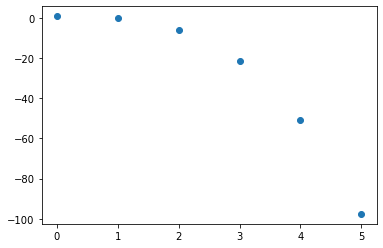

In [15]:
x = [0, 1, 2, 3, 4, 5]
y = magic_f(x)
plt.scatter(x, y);

# Learning problems

- Regression $Y = \mathbb{R}$: predict housing prices
- Classification (binary and multiclass) $Y = \mathbb{N}$: predict email category
- Ranking $Y = \mathbb{R}$: rank search engine results

*What we do first is try to cast our problem to one of the known learning problems.*

# Loss function

the (only) difference between learning problems

Let's define a squared loss (what is the problem it fits?)

In [16]:
def loss(prediction, target):
    return (prediction - target)**2

loss(50, 53.25)

10.5625

# Empirical risk

We know just a limited set of values of $f$ so we have to use them to compare $\hat f$

Empirical risk is average loss (error) on the given (training) data

In [17]:
def empirical_risk(predictions, targets):
    return np.mean((np.array(predictions) - np.array(targets))**2)

# Prediction function

the main difference between various algorithms

We have to define $\hat f$. It might be a decision tree, a linear function, a neural network... or, a polynomial:

In [18]:
def predict(parameters, inputs):
    a, b, c, d = parameters
    x = inputs
    return a*x**3 + b*x**2 + c*x + d

# Parameters

$\hat f$ is a family of functions. To use it we have to find its **parameters**. 

Some parameters lead to high empirical risk, some do not.

# Optimization

we can cast our problem to optimization. We minimize objective (empirical risk) that is a function of parameters.

This way we find the best parameter setting.

In [26]:
objective = lambda parameters: empirical_risk([predict(parameters, x_i) for x_i in x[:3]], y[:3])

best_parameters = opt.fmin(objective, x0=[1.01,1,1,1])

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 165
         Function evaluations: 285


array([-1.28605075,  1.25813733, -0.87208197,  0.90001868])

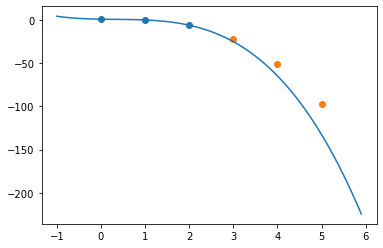

In [29]:
xs = np.arange(-1, 6, 0.1)
ys = [predict(best_parameters, x_i) for x_i in xs]

plt.scatter(x[:3], y[:3])
plt.scatter(x[3:], y[3:])
plt.plot(xs, ys);

best_parameters

# Sounds like approximation/interpolation?

- The thing we just did could be done in 17th century
- Totally different in high-dimensional spaces
- $\hat f$ can get seriously complex (like a neural network)
- The principle is quite similar, though

# Recap

- Identify the problem
- Choose a classifier family
- Optimize to find parameters (fit, train, ..)

# Self-assessment

1. What is the real difference between ranking and regression? Features, labels, or loss function?  
2. You want to get rich so you predict stock prices. Is that a regression, a classification, or a ranking problem?
3. You want to stay rich so you want to predict if the stock you hold is going to crash tomorrow. Is that a regression, a classification, or a ranking problem?
4. You're planning to establish a coffee shop. You're choosing the location: is it regression/classification/ranking?
5. Some of your clients are walking away from you. You can phone call 100 of them per day so you're learning to predict who you are going to call. Is it regression/classification/ranking?

### Next class

**23 Jan 2021:** Linear methods for classification and regression, handling sparse data